# tree.db (using execute function in sqlite3)

In [12]:
import sqlite3
c = sqlite3.connect("trees.db")

def query(sql):
    return list(c.execute(sql))

In [2]:
#q1
query("select * from species")

[('m', 'maple'), ('p', 'pine')]

In [3]:
#q2
query("SELECT x, y FROM trees WHERE tree = 'C'")

[(30, 4)]

In [4]:
#q3
query("SELECT tree FROM trees")

[('A',), ('B',), ('C',), ('D',), ('E',)]

In [5]:
#q4
query("SELECT species FROM trees ORDER BY priority DESC")

[('m',), ('m',), ('m',), ('p',), ('p',)]

In [7]:
#q5
query("SELECT tree, priority FROM trees " +
      "ORDER BY priority DESC LIMIT 1")[0]

('B', 100)

In [9]:
#q6
query("""
SELECT COUNT(SPECIES) AS c1, COUNT(DISTINCT SPECIES) as C2
FROM trees
         """)

[(5, 2)]

In [8]:
#q7
query("""SELECT species, COUNT(SPECIES) AS count,
                AVG(diameter) AS size
         FROM trees
         GROUP BY species ORDER BY count DESC""")

[('m', 3, 10.0), ('p', 2, 7.0)]

# fire.db (using read_sql function in Pandas)

In [34]:
import sqlite3
import pandas as pd

c = sqlite3.connect("fire.db")

def query(sql):
    return pd.read_sql(sql, c)

df = query("""
SELECT * FROM hydrants
""")

In [20]:
query("""
SELECT year, color, SUM(alt) 
FROM hydrants
WHERe year >= 2000
""")

,year,color,SUM(alt)
0,2000,red,5365


In [21]:
query("""
SELECT year, color, SUM(alt)
FROM  hydrants
GROUP BY year
HAVING year >= 2000
""")

,year,color,SUM(alt)
0,2000,red,1065
1,2001,green,1058
2,2010,blue,1081
3,2014,blue,1052
4,2018,blue,1109


In [10]:
#q8
query("SELECT color, year FROM hydrants WHERE color = 'blue' ")

,color,year
0,blue,2010
1,blue,2014
2,blue,2018


In [12]:
#q9
df = query("SELECT color, year FROM hydrants")
df[df.color == "blue"]

pandas.core.frame.DataFrame

In [12]:
#q10
query("SELECT idx FROM hydrants WHERE owner='private' AND active")

,idx
0,3


In [13]:
#q11
df = query("SELECT year, style, active FROM hydrants")
df[df.active == 1]["style"]

2    Pacer
3    Pacer
4    Pacer
5    Pacer
Name: style, dtype: object

In [29]:
#q12
q12 = query("SELECT color, COUNT(*) FROM hydrants GROUP BY color")

In [14]:
#q13
query("""SELECT color, COUNT() FROM hydrants
         WHERE active GROUP BY color""")

,color,COUNT()
0,blue,3
1,green,1


In [15]:
#q14
query("""SELECT color, COUNT() AS count FROM hydrants
         GROUP BY color HAVING count > 1""")

,color,count
0,blue,3
1,red,2


In [41]:
#q15
query("""SELECT color, COUNT(*) AS count
         FROM hydrants WHERE year >= 2000
         GROUP BY color HAVING count < 2""")

,color,count
0,green,1
1,red,1


In [27]:
print(query("""SELECT color, COUNT(*) AS count
         FROM hydrants WHERE year >= 2000
         GROUP BY color HAVING count < 2""")['count'].cumprod.__doc__)


Return cumulative product over a DataFrame or Series axis.

Returns a DataFrame or Series of the same size containing the cumulative
product.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The index or the name of the axis. 0 is equivalent to None or 'index'.
skipna : boolean, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
*args, **kwargs :
    Additional keywords have no effect but might be accepted for
    compatibility with NumPy.

Returns
-------
cumprod : scalar or Series

Examples
--------
**Series**

>>> s = pd.Series([2, np.nan, 5, -1, 0])
>>> s
0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

By default, NA values are ignored.

>>> s.cumprod()
0     2.0
1     NaN
2    10.0
3   -10.0
4    -0.0
dtype: float64

To include NA values in the operation, use ``skipna=False``

>>> s.cumprod(skipna=False)
0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

**DataFrame**

>>> df = pd.Da

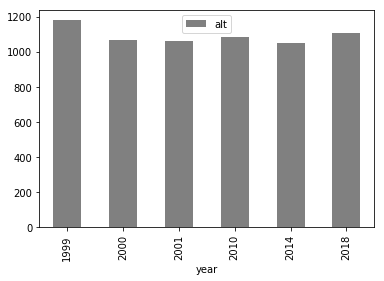

In [40]:
df.plot.bar(x = "year", y="alt",color="gray")

In [43]:
df1 = df.set_index("year")
df1["alt"].plot.sc

AttributeError: 'SeriesPlotMethods' object has no attribute 'scatter'

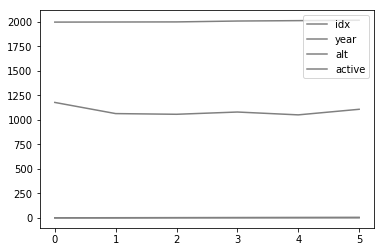

In [45]:
df.plot.line(color="gray")

In [48]:
df.plot.pie(subplots=True)

ValueError: pie doesn't allow negative values

In [55]:
import math
from pandas import DataFrame, Series
examples = [] 
n=1 
while n <= 1000000:     
    examples.append({"n":n, "log(n)":math.log10(n)})     
    n *= 10
DataFrame(examples,columns=["happy","worry"])

,happy,worry
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN


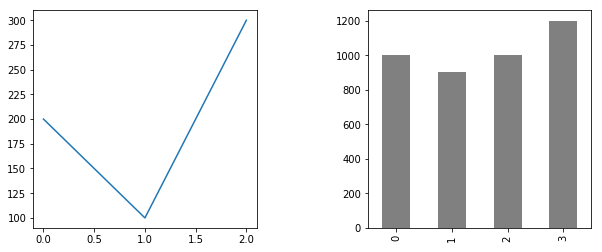

In [70]:
from matplotlib import pyplot as plt
t = plt.subplots(ncols=2, figsize=(10,4))
ax_list = list(t[1])
series1 = Series([200,100,300]) 
series2 = Series([1000,900,1000,1200])
series1.plot.line(ax=ax_list[0]) 
series2.plot.bar(ax=ax_list[1], color="gray")
plt.subplots_adjust(hspace=1,wspace=0.5)
None

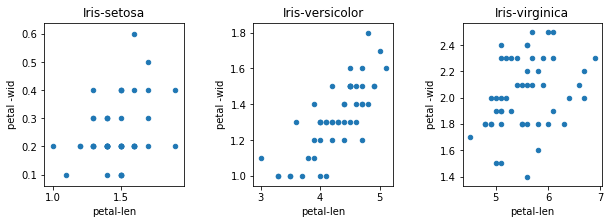

In [76]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal-len', 'sepal-wid', 'petal-len', 'petal -wid', 'name']) 
df.head()

name_counts = df['name'].value_counts()

t = plt.subplots(ncols=len(name_counts), figsize=(10,3))
plt.subplots_adjust(wspace=0.5)
ax_list = list(t[1])
for name in name_counts.index:
    ax = ax_list.pop(0)
    df[df['name'] == name].plot.scatter(x='petal-len', y='petal -wid', ax=ax, title=name)

In [74]:
df

,sepal-len,sepal-wid,petal-len,petal -wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [77]:
def plot_pair(n):     
    t = plt.subplots(ncols=2, figsize=(14,6))     
    plt.subplots_adjust(wspace=0.5)     
    t[0].suptitle("Plot "+str(n), fontsize=24)     
    return list(t[1])

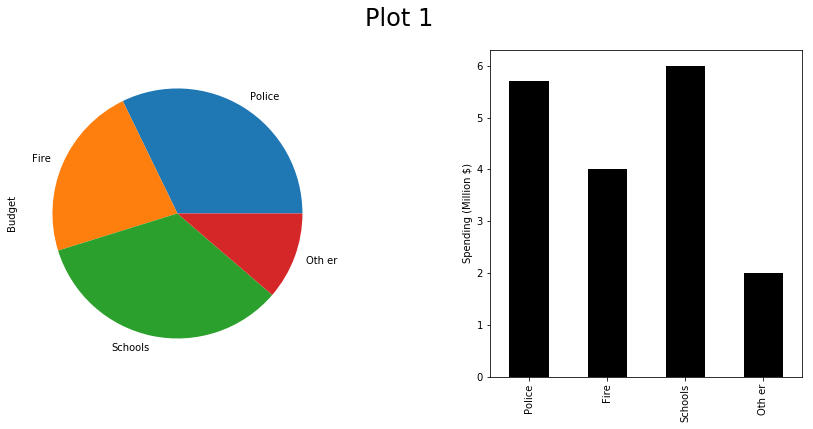

In [79]:
ax = plot_pair(1)
budget = Series([5.7,4,6,2], index=["Police", "Fire", "Schools", "Oth er"], name="Budget")
# plot 1 
budget.plot.pie(ax=ax[0])
# plot 2 
budget.plot.bar(ax=ax[1], color="black") 
ax[1].set_ylabel("Spending (Million $)")
None

In [80]:
type(t)

tuple

In [84]:
t[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c1684a8>,
      dtype=object)